<a href="https://colab.research.google.com/github/VielF/ColabProjects/blob/main/Pr%C3%A1tica_Filtragem_no_Dom%C3%ADnio_da_Frequ%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade do Vale do Itajaí<br>
Escola Politécnica<br>
Processamento Digital de Sinais: Imagens

# Prática com Filtros no domínio da Frequência

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

## Usando a DFT e FFT da OpenCV

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow


In [35]:
img = cv2.imread('data/t1.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = (20*np.log(np.abs(fshift) + 0.00001)/255)
magnitude_spectrum = np.array(magnitude_spectrum, dtype=np.float32)

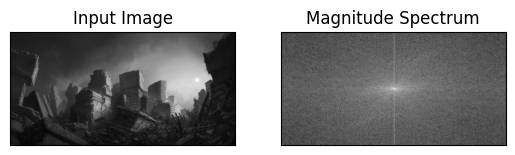

In [36]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


#mostrando a imagem de entrada
cv2.imshow('in', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#mostrando a magnitude da TF
cv2.imshow('magnitude_spectrum', magnitude_spectrum)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [37]:
img = cv2.imread('data/t1.jpg',0)
image_f32 = np.float32(img) # convert from uint8 into float32
dft = cv2.dft(image_f32, flags = cv2.DFT_COMPLEX_OUTPUT)
fft_shift = np.fft.fftshift(dft) #aplica FFT e posteriormente a desloca - dica é usar a função presente na numpy
magnitude_spectrum = 20 * np.log(cv2.magnitude(fft_shift[:, :, 0], fft_shift[:, :, 1])) # cria o espectro de magnitude

#caso use o colab, utilize o patch corretamente
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [38]:
# Calcular a Transformada de Fourier
img = cv2.imread('data/t1.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Criar o filtro passa-alta ideal
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
raio = 30  # Defina o raio do filtro passa-alta aqui

mask = np.ones((rows, cols), np.uint8)
x, y = np.ogrid[:rows, :cols]
mask_area = (x - crow) ** 2 + (y - ccol) ** 2 <= raio ** 2
mask[mask_area] = 0

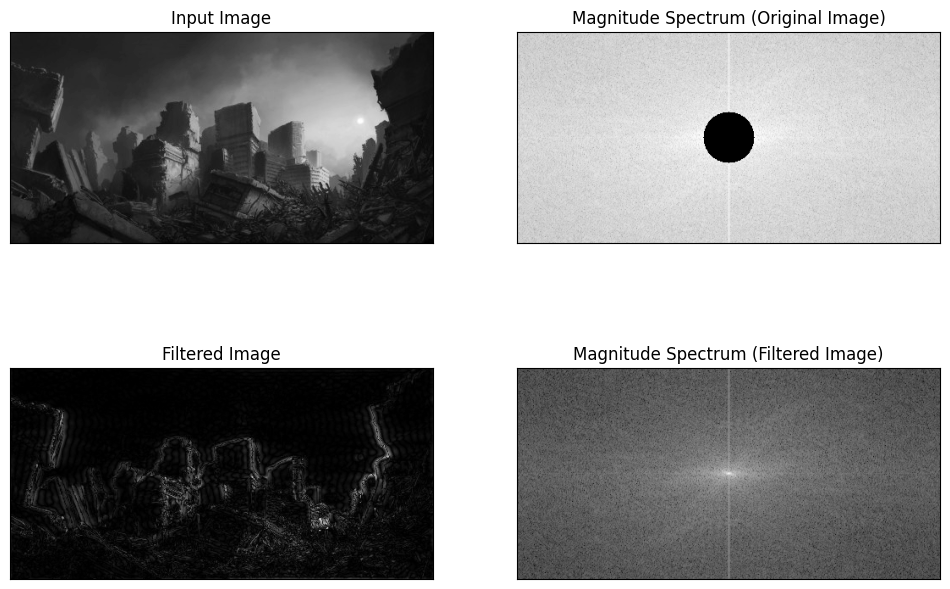

In [39]:
fshift *= mask

# Calcular o espectro de magnitude da imagem original
magnitude_spectrum_original = 20 * np.log(np.abs(fshift) + 0.00001)

# Inverter o shift para obter a TF original
f_ishift = np.fft.ifftshift(fshift)

# Aplicar a Transformada Inversa de Fourier (TIF)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Normalizar a imagem para o intervalo 0-255
img_back = (img_back - img_back.min()) / (img_back.max() - img_back.min()) * 255

# Converter para tipo de dado uint8 (8 bits)
img_back = img_back.astype(np.uint8)

# Calcular o espectro de magnitude da imagem filtrada
# Aplicar fftshift antes de calcular o espectro de magnitude
fshift = np.fft.fftshift(f)
magnitude_spectrum_filtered = 20 * np.log(np.abs(fshift) + 0.00001)

# Exibir a imagem original, a imagem filtrada e seus espectros de magnitude
plt.figure(figsize=(12, 8))

plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(magnitude_spectrum_original, cmap='gray')
plt.title('Magnitude Spectrum (Original Image)'), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(img_back, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])

plt.subplot(224), plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.title('Magnitude Spectrum (Filtered Image)'), plt.xticks([]), plt.yticks([])

plt.show()

SyntaxError: invalid syntax (1582886443.py, line 2)

## Criando outros kernels - Gaussiano e Butterworth 

### Filtro passa-baixa

O filtro passa-baixa, que retém as informações de baixa frequência da transformada de Fourier e filtra as informações de alta frequência, tornará a imagem mais desfocada. Os filtros passa-baixa comumente usados incluem filtro passa-baixo ideal, filtro passa-baixo Butterworth e filtro passa-baixo Gaussiano. Suponha que a altura e a largura da transformada de Fourier sejam H e W, o valor máximo do espectro de Fourier está no ponto central (maxR,maxC) e D(r,c) representa a distância do ponto (r,c) até o ponto central


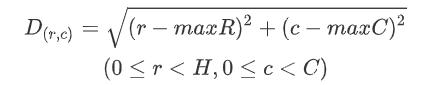


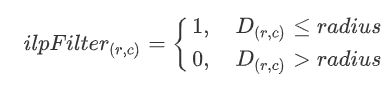


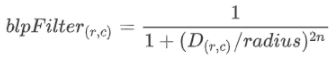


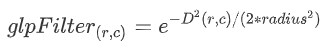

### Filtro passa-alta

O filtro passa-alta retém as informações de alta frequência da imagem e filtra as informações de baixa frequência, o que torna os detalhes da imagem mais óbvios. Os filtros passa-alta comumente usados incluem filtro passa-alto ideal, filtro passa-alto Butterworth e filtro passa-alto gaussiano. Três tipos de filtros passa-altas podem ser expressos da seguinte forma


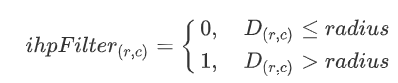

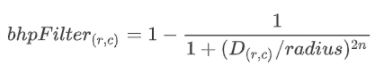


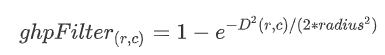

### Filtro passa-banda

O filtro passa-banda serve para reter apenas a banda de frequência de uma determinada área e filtrar as informações de frequência, que podem selecionar seletivamente parte das informações da imagem. Os filtros passa-banda comumente usados incluem filtro passa-banda ideal, filtro passa-banda Butterworth e filtro passa-banda gaussiano. Assumindo que BW representa a largura de banda e D0 representa o centro radial da largura de banda, os três filtros passa banda podem ser expressos da seguinte forma


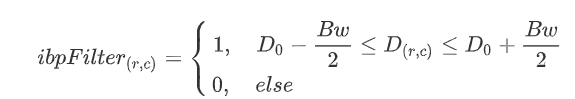


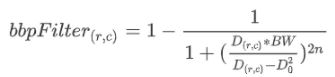


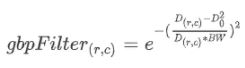

### Filtro rejeita-banda

Em contraste com o filtro passa-banda, o filtro de rejeita-banda se refere a filtrar ou enfraquecer a banda de frequência na faixa especificada. Os filtros de rejeita-banda comumente usados incluem filtro de parada de banda ideal, filtro de parada de banda Butterworth e filtro de parada de banda Gaussiana. Os três filtros de parada de banda são representados da seguinte forma


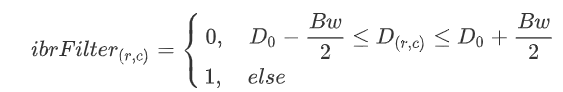


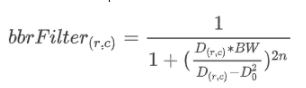

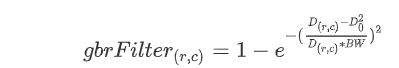

### Funções

In [40]:

def createPB(shape, center, radius, lpType=2, n=2):
    rows, cols = shape
    r, c = np.mgrid[:rows, :cols]
    c -= center[0]
    r -= center[1]
    d = np.sqrt(c**2 + r**2)

    lpFilter = np.ones((rows, cols), np.float32)

    if lpType == 0:  # Ideal low-pass filter
        lpFilter[d <= radius] = 0
    elif lpType == 1:  # Butterworth low-pass filter
        lpFilter = 1 / (1 + (d / radius)**(2*n))
    elif lpType == 2:  # Gaussian low-pass filter
        lpFilter = np.exp(-(d**2) / (2 * (radius**2)))

    return lpFilter

def createPA(shape, center, radius, lpType=2, n=2):
    rows, cols = shape
    r, c = np.mgrid[:rows, :cols]
    c -= center[0]
    r -= center[1]
    d = np.sqrt(c**2 + r**2)

    lpFilter = np.ones((rows, cols), np.float32)

    if lpType == 0:  # Ideal high-pass filter
        lpFilter[d <= radius] = 0
    elif lpType == 1:  # Butterworth high-pass filter
        d[d == 0] = 1  # Avoid division by zero
        lpFilter = 1 / (1 + (radius / d)**(2*n))
    elif lpType == 2:  # Gaussian high-pass filter
        lpFilter = 1 - np.exp(-(d**2) / (2 * (radius**2)))

    return lpFilter

def createPF(shape, center, bandCenter, bandWidth, lpType=2, n=2):
    rows, cols = shape
    r, c = np.mgrid[:rows, :cols]
    c -= center[0]
    r -= center[1]
    d = np.sqrt(c**2 + r**2)

    lpFilter = np.zeros((rows, cols), np.float32)

    if lpType == 0:  # Ideal band-pass filter
        lpFilter[(d >= bandCenter - bandWidth/2) & (d <= bandCenter + bandWidth/2)] = 1
    elif lpType == 1:  # Butterworth band-pass filter
        lpFilter = 1 / (1 + ((d**n - bandCenter**n) / (d**n * bandWidth/2)**n))
    elif lpType == 2:  # Gaussian band-pass filter
        lpFilter = np.exp(-((d - bandCenter)**2) / (2 * (bandWidth/2)**2))

    return lpFilter

def createRF(shape, center, bandCenter, bandWidth, lpType=2, n=2):
    rows, cols = shape
    r, c = np.mgrid[:rows, :cols]
    c -= center[0]
    r -= center[1]
    d = np.sqrt(c**2 + r**2)

    lpFilter = np.zeros((rows, cols), np.float32)

    if lpType == 0:  # Ideal band stop filter
        lpFilter[(d >= bandCenter - bandWidth/2) & (d <= bandCenter + bandWidth/2)] = 1
    elif lpType == 1:  # Butterworth band stop filter
        lpFilter = 1 / (1 + ((d**n - bandCenter**n) / (d**n * bandWidth/2)**n))
    elif lpType == 2:  # Gaussian band stop filter
        lpFilter = np.exp(-((d - bandCenter)**2) / (2 * (bandWidth/2)**2))

    return lpFilter


In [41]:
img = cv2.imread('data/t1.jpg',0)

# Converter para float32
image_f32 = np.float32(img)

# Aplicar DFT
dft = cv2.dft(image_f32, flags=cv2.DFT_COMPLEX_OUTPUT)

# Aplicar FFT e deslocamento da FFT
fft_shift = np.fft.fftshift(dft)

# Calcular o espectro de magnitude
magnitude_spectrum = 20 * np.log(cv2.magnitude(fft_shift[:, :, 0], fft_shift[:, :, 1]))

# Exibir a imagem original
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

'''
 Pode-se seguir as dicas a seguir para implementar essa normalização
    - Aplicar o absoluto, seguido pela subtração entre os valores - np.abs
    - Subtrair os valores dos pixels do valor do menor pixel - .min
    - Multiplcar a imagem por 255 e dividir pelo pixel de maior valor - .max
    - fazer um cast para 8 bits pela própria Numpy - astype()
'''

# Normalizar o espectro de magnitude para o intervalo 0-255
magnitude_spectrum -= magnitude_spectrum.min()
magnitude_spectrum = magnitude_spectrum / magnitude_spectrum.max() * 255

# Converter para tipo de dado uint8 (8 bits)
magnitude_spectrum = magnitude_spectrum.astype(np.uint8)

# Exibir o espectro de magnitude
cv2.imshow('magnitude_spectrum', magnitude_spectrum)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [42]:
img = cv2.imread('data/t1.jpg', 0)

# Calcular a Transformada de Fourier
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Obter o tamanho da imagem no domínio da frequência
nrows, ncols = fshift.shape

# Calcular o valor real, imaginário e amplitude
real = np.power(np.abs(fshift), 2)  # Não há necessidade de acessar uma terceira dimensão aqui
imaginary = np.zeros_like(fshift)  # Não há componente imaginária para uma imagem no domínio da frequência
amplitude = np.abs(fshift)

# Encontrar a posição do máximo valor de amplitude
minValue, maxValue, minLoc, maxLoc = cv2.minMaxLoc(amplitude)


In [43]:

# Criar máscaras para diferentes tipos de filtros
maskPB = createPB(fshift.shape, center=maxLoc, radius=35, lpType=1, n=2)
maskPA = createPA(fshift.shape, center=maxLoc, radius=35, lpType=1, n=1)
maskPF = createPF(shape=fshift.shape, center=maxLoc, bandCenter=1, bandWidth=400, lpType=2, n=2)
maskRF = createRF(shape=fshift.shape, center=maxLoc, bandCenter=50, bandWidth=50, lpType=2, n=2)

# Aplicar as máscaras
filtered_freq_PB = fshift * maskPB
filtered_freq_PA = fshift * maskPA
filtered_freq_PF = fshift * maskPF
filtered_freq_RF = fshift * maskRF

# Inverter o deslocamento
f_ishift_PB = np.fft.ifftshift(filtered_freq_PB)
f_ishift_PA = np.fft.ifftshift(filtered_freq_PA)
f_ishift_PF = np.fft.ifftshift(filtered_freq_PF)
f_ishift_RF = np.fft.ifftshift(filtered_freq_RF)

# Aplicar a Transformada Inversa de Fourier (TIF)
img_back_PB = np.fft.ifft2(f_ishift_PB)
img_back_PA = np.fft.ifft2(f_ishift_PA)
img_back_PF = np.fft.ifft2(f_ishift_PF)
img_back_RF = np.fft.ifft2(f_ishift_RF)

# Recuperar a magnitude (intensidade) das imagens
img_back_PB = np.abs(img_back_PB)
img_back_PA = np.abs(img_back_PA)
img_back_PF = np.abs(img_back_PF)
img_back_RF = np.abs(img_back_RF)

# Normalizar as imagens para o intervalo 0-255
img_back_PB = (img_back_PB - img_back_PB.min()) / (img_back_PB.max() - img_back_PB.min()) * 255
img_back_PA = (img_back_PA - img_back_PA.min()) / (img_back_PA.max() - img_back_PA.min()) * 255
img_back_PF = (img_back_PF - img_back_PF.min()) / (img_back_PF.max() - img_back_PF.min()) * 255
img_back_RF = (img_back_RF - img_back_RF.min()) / (img_back_RF.max() - img_back_RF.min()) * 255

# Converter para tipo de dado uint8 (8 bits)
img_back_PB = img_back_PB.astype(np.uint8)
img_back_PA = img_back_PA.astype(np.uint8)
img_back_PF = img_back_PF.astype(np.uint8)
img_back_RF = img_back_RF.astype(np.uint8)


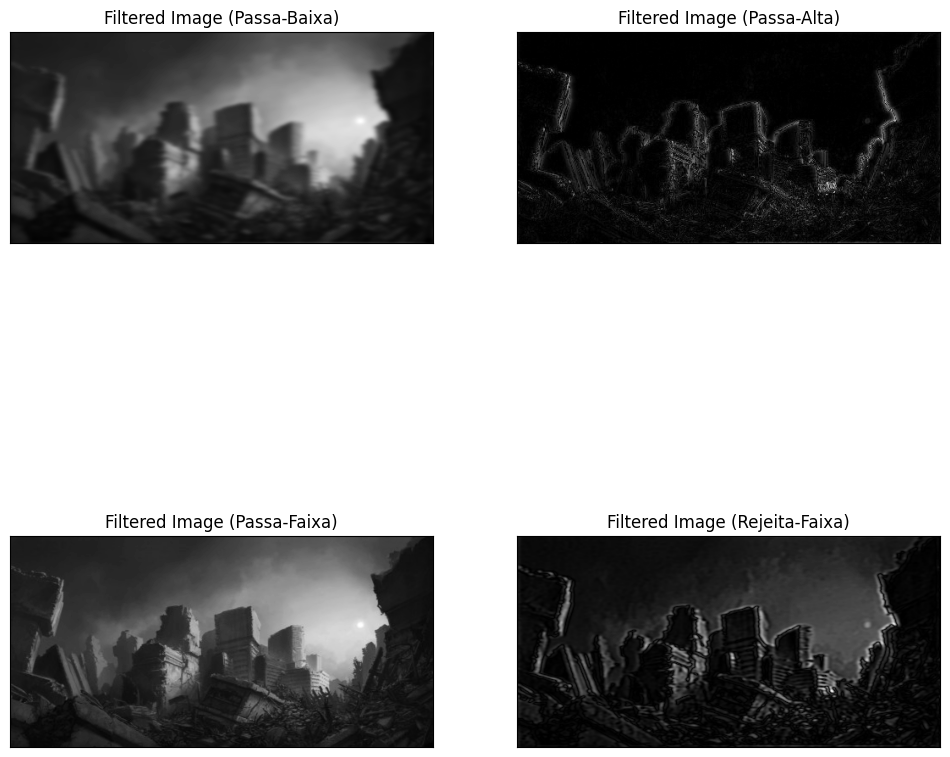

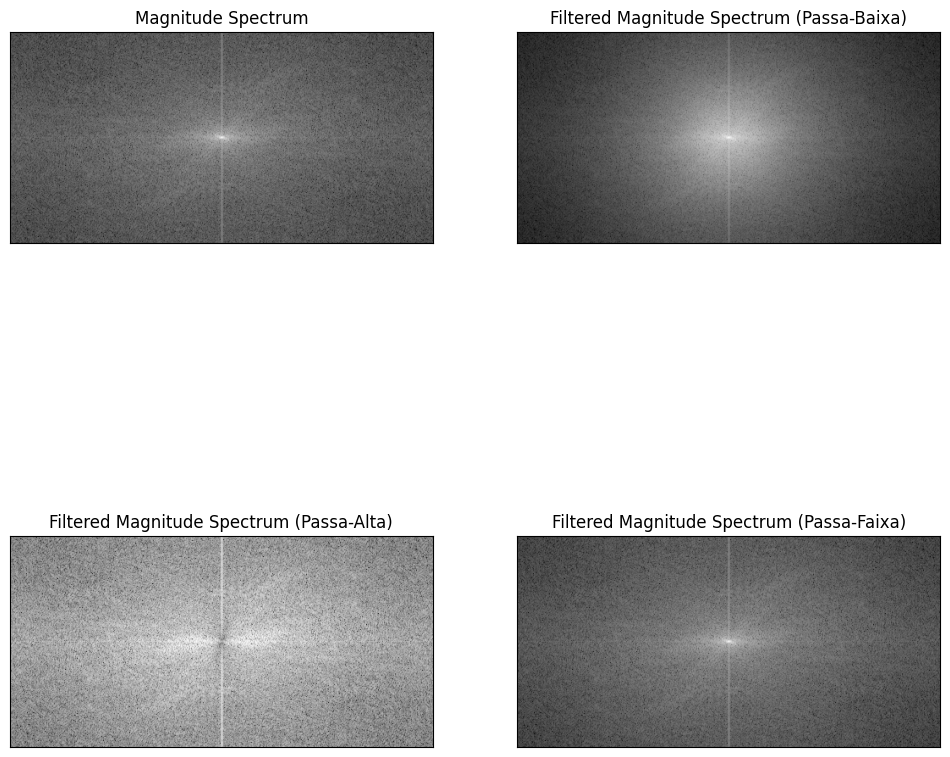

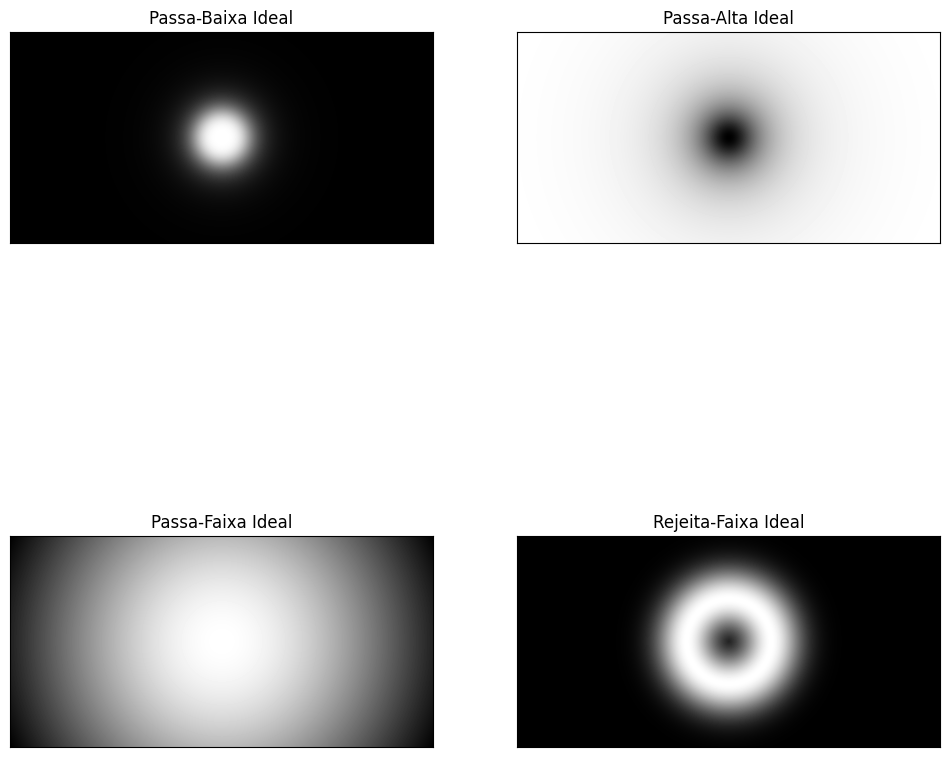

In [44]:
# Exibir as imagens e seus espectros de magnitude
plt.figure(figsize=(12, 12))

plt.subplot(221), plt.imshow(img_back_PB, cmap='gray')
plt.title('Filtered Image (Passa-Baixa)'), plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(img_back_PA, cmap='gray')
plt.title('Filtered Image (Passa-Alta)'), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(img_back_PF, cmap='gray')
plt.title('Filtered Image (Passa-Faixa)'), plt.xticks([]), plt.yticks([])

plt.subplot(224), plt.imshow(img_back_RF, cmap='gray')
plt.title('Filtered Image (Rejeita-Faixa)'), plt.xticks([]), plt.yticks([])

plt.show()

# Exibir os espectros de magnitude
plt.figure(figsize=(12, 12))

plt.subplot(221), plt.imshow(np.log(amplitude), cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(np.log(np.abs(filtered_freq_PB)), cmap='gray')
plt.title('Filtered Magnitude Spectrum (Passa-Baixa)'), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(np.log(np.abs(filtered_freq_PA)), cmap='gray')
plt.title('Filtered Magnitude Spectrum (Passa-Alta)'), plt.xticks([]), plt.yticks([])

plt.subplot(224), plt.imshow(np.log(np.abs(filtered_freq_PF)), cmap='gray')
plt.title('Filtered Magnitude Spectrum (Passa-Faixa)'), plt.xticks([]), plt.yticks([])

plt.show()

# Exibir as máscaras
plt.figure(figsize=(12, 12))

plt.subplot(221), plt.imshow(maskPB, cmap='gray')
plt.title('Passa-Baixa Ideal'), plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(maskPA, cmap='gray')
plt.title('Passa-Alta Ideal'), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(maskPF, cmap='gray')
plt.title('Passa-Faixa Ideal'), plt.xticks([]), plt.yticks([])

plt.subplot(224), plt.imshow(maskRF, cmap='gray')
plt.title('Rejeita-Faixa Ideal'), plt.xticks([]), plt.yticks([])

plt.show()

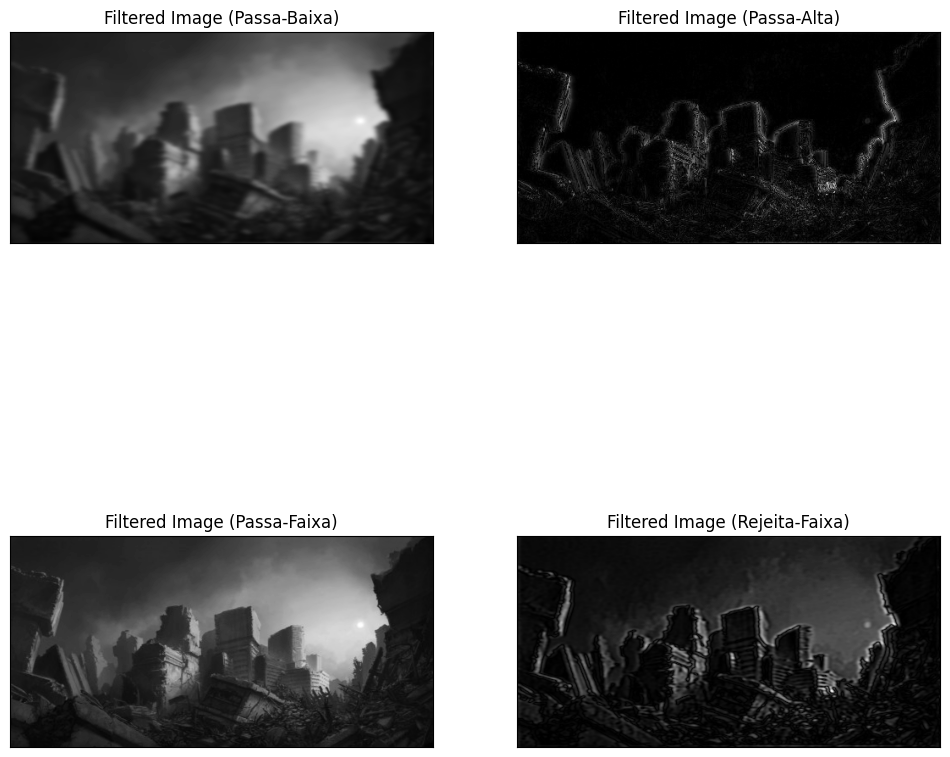

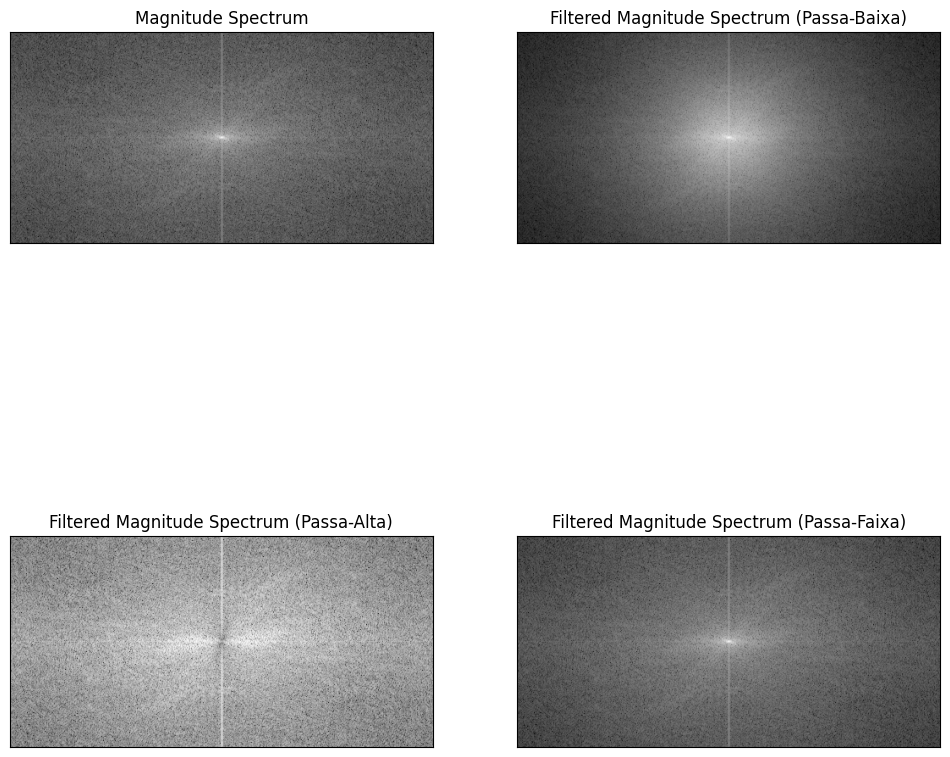

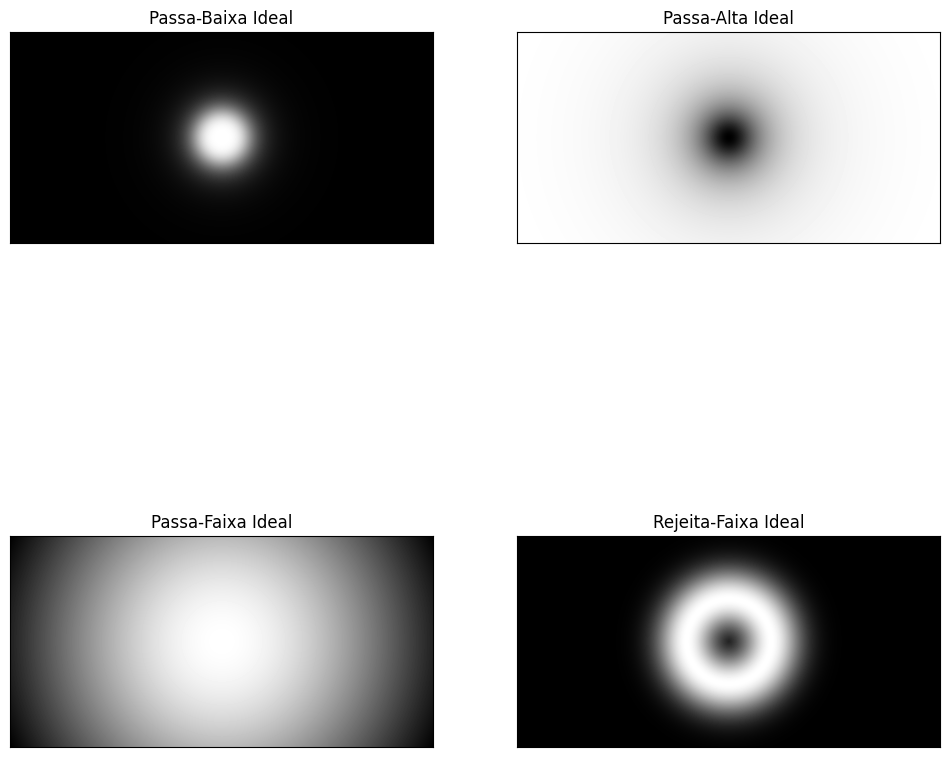